# Life Expectancy and GDP

![title](MapChart_Map.png)

In this project, we will analyze the life expectancy and GDP of six different countries over the years 2000-2015. The countries in the analysis are:
    * Chile
    * China
    * Germany
    * Mexico
    * United States of America
    * Zimbabwe

The GDP and life expectancy data for the project comes from the World Bank and the World Health Organization, respectively.

In [6]:
import pandas as pd

data = pd.read_csv("all_data.csv")
data.head(10)

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10
5,Chile,2005,78.4,1.229650e+11
6,Chile,2006,78.9,1.547880e+11
7,Chile,2007,78.9,1.736060e+11
8,Chile,2008,79.6,1.796380e+11
9,Chile,2009,79.3,1.723890e+11


The dataset contains the following columns:
    * Country
    * Year
    * Life expectancy at birth (years)
    * GDP
We can rename the `Life expectancy at birth (years)` column to make it easier to access.

In [51]:
data = data.rename(columns = {"Life expectancy at birth (years)" : "LEABY"})
data.head(5)

,Country,Year,LEABY,GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


We now can start to perform some analysis on the dataset.

First, we can determine the average life expectancy and average GDP for each country over the time period.

In [13]:
avg_LEABY = data[["Country", "LEABY", "GDP"]].groupby("Country").mean()
avg_LEABY

,LEABY,GDP
Country,,
Chile,78.94375,1.697888e+11
China,74.26250,4.957714e+12
Germany,79.65625,3.094776e+12
Mexico,75.71875,9.766506e+11
United States of America,78.06250,1.407500e+13
Zimbabwe,50.09375,9.062580e+09


Looking through these numbers, we can see that **Germany** has the highest average life expectancy, and the **United States of America** has the greatest average GDP over this time period.

Seeing these aggregate values in a table is fine, but it might be more insightful to see them all plotted over time.

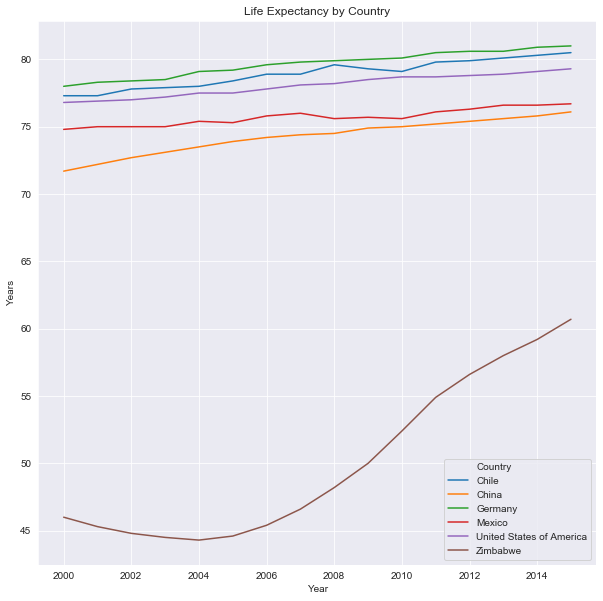

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(10,10))
sns.set_style('darkgrid')
ax = sns.lineplot(data=data, x="Year", y="LEABY", hue="Country")
ax.set(ylabel='Years', title='Life Expectancy by Country')
plt.show()

While **Germany** has consistently had the highest life expectancy, **Chile**, **Germany**, and **United States** have all had generally incresing life expectancies that closely mirror each other, with the **United States** falling slightly behind the other two after 2010.

**Mexico** and **China** have lagged a bit behind these top three, but **China** has made up much of the ground on **Mexico**.

Finally, **Zimbabwe** while still well behind these other 5, they have seen a rapid increase in life expectancy since 2004.

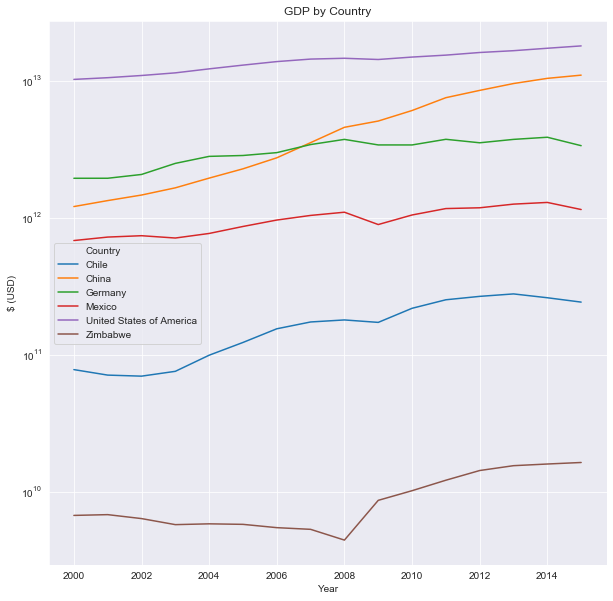

In [26]:
fig = plt.figure(figsize=(10,10))
sns.set_style('darkgrid')
ax = sns.lineplot(data=data, x="Year", y="GDP", hue="Country")
ax.set(ylabel='$ (USD)', title='GDP by Country', yscale="log")
plt.show()

Due to the large difference between the GDP's of Zimbabwe and the United States, it is best to view this plot with a log-scale on the y-axis.

From this plot we see a rather steady increase in GDP by **United States** with **China** closing in rapidly. The other four countries have maintained their positions (outside of **Germany** being overtaken by **China** in 2007) with all of them experiencing flattening or decline in GDP after 2012.

An interesting correlation to understand would be the relationship between GDP and Life Expectancy. To view this, we can utilize a scatter plot while superimposing regression lines onto each cluster .

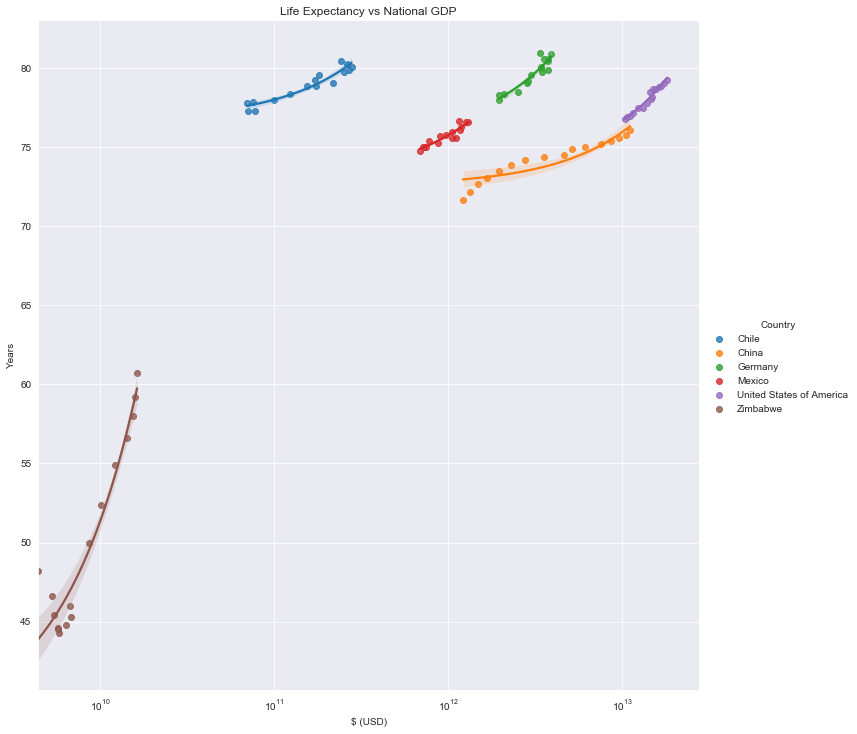

In [52]:
sns.set_style('darkgrid')
ax = sns.lmplot(data=data, x="GDP", y="LEABY", hue="Country", height=10)
ax.set(xlabel='$ (USD)', ylabel="Years", title='Life Expectancy vs National GDP', xscale="log")
plt.show()

From the above plot, we view that all countries seem to have a positive correlation between GDP and Life Expectancy. This correlation is most positive for **Zimbabwe**.

This analysis has allowed us to see the change in GDP and life expectancy over time for the six countries included in this data. We see that China is rapidly closing in on the United States in terms of GDP, while Zimbabwe has made the largest jump in life expectancy.

Further analysis could be to normalize GDP by population to see how the nations compare in this metric, and how this relates to life expectancy. Additionally, we could import data from more countries to see if the positive correlation between GDP and life expectancy holds. Finally, life expectancy is a rather reductive number and does not contain much information on range of lifetimes. Does a country have a particular problem with infant mortality? Do they have quality elder care? Given that a person reaches their 40th birthday, how long are they expected to live? By accessing the data used to calculate the life expectancy number, we could perform analysis such as these suggestions.